In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
SE_size_factor = 0.02
area_factor_very_large = 0.01
area_factor_large = 0.001
lam_factor = 3
num_levels = 255
offset = 80
connectivity = 8
weight_all = 0.33
weight_large = 0.33
weight_very_large = 0.33
lam_binarization = 24
lam_dmsr = 40

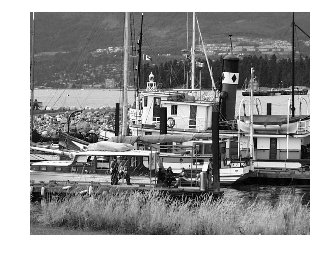

In [4]:
#Load the image
path_to_image = '../tests/images/Gray/Gray_scale.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [5]:
binarizer = sr.DatadrivenBinarizer( lam=lam_binarization,
                 area_factor_large=area_factor_large,
                 area_factor_verylarge=area_factor_very_large,
                 weights=(weight_all, weight_large, weight_very_large),
                 offset=offset,
                 num_levels=num_levels,
                 connectivity=connectivity)

#for now: use simple threshold binarizer
binarizer = sr.ThresholdBinarizer(146)

In [6]:
#our detection object
#det = sr.SalientDetector(binarizer=binarizer, SE_size_factor=SE_size_factor, lam_factor=lam_factor, connectivity=connectivity)
det = sr.SalientDetector(SE_size_factor=SE_size_factor, lam_factor=lam_factor, connectivity=connectivity)

In [7]:
area = img.shape[0] * img.shape[1]
SE2, lam2 = det.get_SE(area)
print area
print lam2, SE2.shape
print lam_factor*np.floor(SE_size_factor*np.sqrt(area/np.pi))

578000
24 (15, 15)
24.0


24 (15, 15)


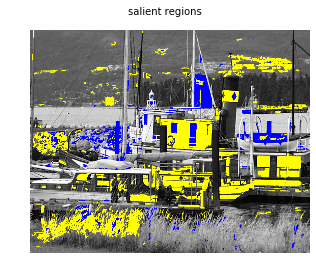

In [8]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=False,
                    find_protrusions=False, 
                    visualize=False)
#assert det.lam == lam
print det.lam, det.SE.shape#, lam
sr.visualize_elements(img, regions=regions);

{'islands': 200, 'holes': 120}


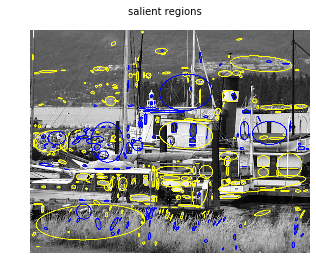

In [9]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'islands': 176, 'holes': 44}


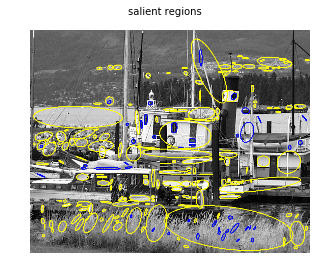

In [10]:
matfile = sio.loadmat('../tests/images/Gray/Gray_scale_dmsrregions.mat')
masks = matfile['saliency_masks'] * 255
holes_true = masks[:,:, 0]
islands_true = masks[:,:, 1]
regions_dmsr = {"holes": holes_true, "islands": islands_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsr, features_standard_dmsr, features_poly_dmsr = sr.binary_mask2ellipse_features(regions_dmsr, 
                                                                                connectivity=connectivity)
print(num_regions_dmsr)
sr.visualize_elements_ellipses(img, features_standard_dmsr);

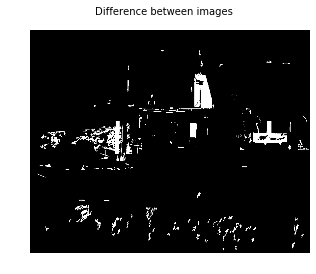

False


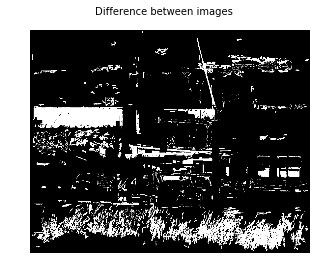

False


In [11]:
print sr.image_diff(regions['holes'], holes_true)
print sr.image_diff(regions['islands'], islands_true)